# Projet IA et Décision en Santé

# 1- Data Acquisition

Nous travaillons sur un système de recommandation des activités sportives à partir de 2 algorithmes de recommandation (Random Forest classifier ; k-NN ; SVM). Pour cela, nous allons traiter les données d’un ancien réseau social appelé Endomondoà grâce à la librairie Surpr!se.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import re
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import ast


#Visualisation des graphiques
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# import plotly.express as px
# from plotly.offline import init_notebook_mode, plot, iplot

# 2- Importation de la dataframe

In [ ]:
df = pd.read_csv('./sampled_edomondoHR.csv')

In [ ]:
df.head()

,altitude,derived_speed,distance,gender,heart_rate,id,latitude,longitude,since_begin,since_last,sport,tar_derived_speed,tar_heart_rate,time_elapsed,timestamp,userId
0,[5.00494316 5.00681462 5.00649676 5.00811409 5...,[-7.08294444 -6.09093867 -6.65049489 -6.731846...,[-4.37230365 -3.94774554 -4.10572351 -4.153479...,male,[-9.67979552 -7.75729034 -6.56677273 -7.410950...,47427787,"[40.106966, 40.107007, 40.107037, 40.107012, 4...","[-3.655368, -3.655398, -3.655413, -3.655428, -...","[-14.805054276856485, -14.805054276856485, -14...","[-0.011580266728650795, -0.011580266728650795,...",indoor cycling,"[0.0, 2.493815038438873, 1.087140026208079, 0....","[92.99999999999997, 102.07804629198924, 107.69...",[-1.22567526e-01 -1.22121746e-01 -1.21675966e-...,"[1333996256, 1333996263, 1333996272, 133399628...",1737182
1,[-1.2767173 -1.27671726 -1.27671724 -1.276721...,[-7.08294444 -3.78673235 -4.03591539 -3.455853...,[-4.37230365 -1.43699928 -4.20718887 -3.569759...,male,[-9.89157074 -8.33322121 -5.17443529 -2.693201...,112469307,"[14.6539222, 14.6539129, 14.6538817, 14.653887...","[121.0689574, 121.0689624, 121.0691502, 121.06...","[-14.805054276856485, -14.805054276856485, -14...","[-0.011580266728650795, -0.011580266728650795,...",run,"[0.0, 8.286386544034295, 7.6599623426466295, 9...","[92.0, 99.35850768326127, 114.27425670560183, ...",[-1.22567526e-01 -1.22121746e-01 -1.21675966e-...,"[1355166597, 1355166598, 1355166614, 135516661...",3680369
2,[-1.98524266 -1.97928563 -1.9910576 -2.015631...,[ -7.08294444 -2.93873719 -5.50911158 -4.30...,[-4.37230365e+00 -2.87813162e+00 -1.82308811e+...,male,[-1.37035246e+01 -1.36956382e+01 -1.37649179e+...,440715200,"[54.94686392135918, 54.946874817833304, 54.947...","[20.165090700611472, 20.165092209354043, 20.16...","[-14.805054276856485, -14.805054276856485, -14...","[-0.011580266728650795, -0.011580266728650795,...",run,"[3.552713678800501e-15, 10.418171607203245, 3....","[74.0, 74.03723924099883, 73.71010148632593, 7...",[-1.22567526e-01 -1.22121746e-01 -1.21675966e-...,"[1416758903, 1416758904, 1416758916, 141675893...",7404960
3,[-2.14560848e+00 -1.48081926e+00 -9.56598905e-...,[-7.08294444 -4.75040823 -1.14330375 0.139602...,[-4.37230365 -3.41911958 -2.67006239 -0.756465...,male,[-6.92671776 -4.80896564 -2.64534675 -2.014093...,293199394,"[55.8143845, 55.8143177, 55.81422, 55.8141679,...","[37.7922781, 37.7923124, 37.792257, 37.7921083...","[-14.805054276856485, -14.805054276856485, -14...","[-0.011580266728650795, -0.011580266728650795,...",run,"[0.0, 5.863790355993272, 14.931732957482932, 1...","[106.0, 116.0, 126.2165823334203, 129.19735168...",[-1.22567526e-01 -1.22121746e-01 -1.21675966e-...,"[1391504709, 1391504712, 1391504719, 139150472...",4584909
4,[-2.14560848 -2.11446474 -2.0833768 -2.052304...,[-7.08294444 -3.19245548 -1.12232138 -0.394913...,[-4.37230365 2.47512186 6.10155505 7.340742...,male,[ 0.06186424 1.43252798 2.47071548 3.238492...,381221948,"[28.06710192002356, 28.066426506265998, 28.065...","[-16.72524799592793, -16.7240425106138, -16.72...","[-14.805054276856485, -14.805054276856485, -14...","[-0.011580266728650795, -0.011580266728650795,...",bike,"[0.0, 9.780346175418495, 14.984480781024477, 1...","[139.0, 145.47225765310662, 150.37456650167763...",[-1.22567526e-01 -1.22121746e-01 -1.21675966e-...,"[1366644391, 1366644421, 1366644450, 136664447...",11917849


# 3. Nettoyage et pré-traitement des données

Maintenant qu'on comprend notre jeu de données, on procède au nettoyage. Dans cette partie, on vise à enlever les datas non nécessaires pour la création de notre modèle.

In [1]:
# Copie pour nettoyer les données

df_clean = df.copy()

#---------------------------------------------------------------------------------------------------------------------------------------------------

# Changement les valeurs 'male' et 'female' par des entiers (inutile car donnée supprimée)
# for i in range (df_clean.shape[0]) :
#     if df_clean['gender'][i] == 'male' :
#         df_clean['gender'][i] = 1
#     else : df_clean['gender'][i] = 0

#---------------------------------------------------------------------------------------------------------------------------------------------------

# Nettoyage de la colonne derived_speed
# On enlève les caractères compliqués et les remplace par des virgules & enlève la virgule du début
df_clean['derived_speed'] = (df_clean['derived_speed'].str.replace('[^0-9.-]+', ',')).str.lstrip(',')
df_clean['derived_speed'] = df_clean['derived_speed'].str.rstrip(',')
# On enlève les *10^-1 car c'etait de la forme "nb e-01"
df_clean['derived_speed'] = df_clean['derived_speed'].str.replace(',-01,', ',')
# De même pour la forme "nb e00"
df_clean['derived_speed'] = df_clean['derived_speed'].str.replace(',00,', ',')
# Remplace les virgules par des espaces
df_clean['derived_speed'] = df_clean['derived_speed'].str.replace(',', ' ')
# Individualise chaque donnée
df_clean['derived_speed'].str.split(',')

# Transforme chaque donnee en float
for i in range (df_clean.shape[0]) :
    df_clean['derived_speed'][i] = re.findall(r'\d+\.\d+', str(df_clean['derived_speed'][i])) # findall( ) transforme tout les string en int

for i in range (df_clean.shape[0]) :
    df_clean['derived_speed'][i] = statistics.mean(pd.to_numeric(df_clean['derived_speed'][i]))

df_clean['derived_speed'] =  pd.to_numeric(df_clean['derived_speed'])

#---------------------------------------------------------------------------------------------------------------------------------------------------

# Nettoyage de la colonne heart_rate de la même manière que derived_speed

df_clean['heart_rate'] = (df_clean['heart_rate'].str.replace('[^0-9.-]+', ',')).str.lstrip(',')
df_clean['heart_rate'] = df_clean['heart_rate'].str.rstrip(',')
df_clean['heart_rate'] = df_clean['heart_rate'].str.replace(',-01,', ',')
df_clean['heart_rate'] = df_clean['heart_rate'].str.replace(',00,', ',')
df_clean['heart_rate'] = df_clean['heart_rate'].str.replace(',', ' ')
df_clean['heart_rate'].str.split(',')

for i in range (df_clean.shape[0]) :
    df_clean['heart_rate'][i] = re.findall(r'\d+\.\d+', str(df_clean['heart_rate'][i]))

for i in range (df_clean.shape[0]) :
    df_clean['heart_rate'][i] = statistics.mean(pd.to_numeric(df_clean['heart_rate'][i]))

df_clean['heart_rate'] =  pd.to_numeric(df_clean['heart_rate'])

#---------------------------------------------------------------------------------------------------------------------------------------------------

# De même pour colonne distance

df_clean['distance'] = (df_clean['distance'].str.replace('[^0-9.-]+', ',')).str.lstrip(',')
df_clean['distance'] = df_clean['distance'].str.rstrip(',')
df_clean['distance'] = df_clean['distance'].str.replace(',-01,', ',')
df_clean['distance'] = df_clean['distance'].str.replace(',00,', ',')
df_clean['distance'] = df_clean['distance'].str.replace(',', ' ')
df_clean['distance'].str.split(',')

for i in range (df_clean.shape[0]) :
    df_clean['distance'][i] = re.findall(r'\d+\.\d+', str(df_clean['distance'][i]))

# Pour mettre toutes les valeurs de la liste 'distance' en float :
    # .shape[0] : donne le nb de lignes
    # .shape[1] : donne le nb de colonnes

for i in range (df_clean.shape[0]) :
    df_clean['distance'][i] =  pd.to_numeric(df_clean['distance'][i])

#---------------------------------------------------------------------------------------------------------------------------------------------------

# On applique abs à chaque element dans chaque list de la colonne 'numbers'
df_clean['distance'] = df_clean['distance'].apply(lambda x: [abs(i) for i in x])

# Somme des valeurs
df_clean['distance'] = df_clean['distance'].apply(sum)

#---------------------------------------------------------------------------------------------------------------------------------------------------

# On compte le nombre de valeurs dans 'sport'
counts = df_clean['sport'].value_counts()

# Masque booléen pour les sports avec moins de 50 participants pour les retirer
mask = df_clean['sport'].isin(counts[counts < 70].index)
df_clean = df_clean[~mask]

# Creation d'un dictionnaire pour associer les sports à des index et les remplacer
sport_index = {'bike': 0, 'run': 1, 'mountain bike': 2, 'bike (transport)': 3, 'indoor cycling': 4}
df_clean['sport_index'] = df_clean['sport'].replace(sport_index)
df_clean['sport_index'] = pd.to_numeric(df_clean['sport_index'])

# On enlève les colonnes qu'on juge inutiles
df_clean = df_clean.drop(columns=['latitude','longitude','time_elapsed','tar_derived_speed','tar_heart_rate', 'altitude','sport','since_last','since_begin','gender'])

In [ ]:
df_clean.columns

Index(['derived_speed', 'distance', 'heart_rate', 'id', 'timestamp', 'userId',
       'sport_index'],
      dtype='object')

In [ ]:
# CREATION DE LA COLONNE "DURATION"

# 1ère méthode (non utilisée) :
# df['length'] = df['since_last'] + df['since_begin']

# 2ème méthode (utilisée) :
# On définit les fonctions lambda pour enlever les premiers et derniers éléments
get_first = lambda x: x.replace('[',"").replace(']',"").split()[0].rstrip(',')
get_last = lambda x: x.replace('[',"").replace(']',"").split()[-1]

# On applique lambda pour créer les nouvelles colonnes
df_clean['first'] = df_clean['timestamp'].apply(get_first)
df_clean['last'] = df_clean['timestamp'].apply(get_last)

# Nouvelle colonne par soustraction de 'first' et 'last'
df_clean['duration'] = df_clean['last'].astype(float) - df_clean['first'].astype(float)

# # Conversion en minutes
df_clean['duration'] = (df_clean['duration']) / 60

df_clean = df_clean.drop(columns=['timestamp','first','last'])


In [ ]:
#Créer un fichier csv pour stocker une partie des données (ça ira plus vite pour compiler)

df_clean.to_csv('df_clean.csv', index=False)

# 2. Exploration de la dataframe

Chaque fois que nous commençons à travailler avec un nouvel ensemble de données et avant de passer à la prise de décisions de conception et à la création d'un modèle, nous devons apprendre à connaître nos données. Répondons à quelques questions concernant notre ensemble de données :


In [ ]:
# Affichage des premières lignes de la database après traitements
df_clean.head()

,derived_speed,distance,heart_rate,id,userId,sport_index,duration
0,6.783028,1247.232668,2.817562,47427787,1737182,4,63.650000
1,3.944881,943.446695,5.642926,112469307,3680369,1,29.216667
2,4.911791,1201.431728,3.933978,440715200,7404960,1,45.416667
3,2.788254,685.073894,4.181076,293199394,4584909,1,37.466667
4,2.530561,1287.655935,7.092619,381221948,11917849,0,146.716667


In [ ]:
# Visualiser les dimensions de l'ensemble de données
# lignes, colonnes

df.shape

(10299, 16)

#### Le résumé de l'ensemble des données


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10015 entries, 0 to 10298
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   derived_speed  10015 non-null  float64
 1   distance       10015 non-null  float64
 2   heart_rate     10015 non-null  float64
 3   id             10015 non-null  int64  
 4   userId         10015 non-null  int64  
 5   sport_index    10015 non-null  int64  
 6   duration       10015 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 625.9 KB


#### Distribution de fréquence des valeurs des variables

In [ ]:
for var in df.columns:

    print(df[var].value_counts())

[5.00494316 5.00681462 5.00649676 5.00811409 5.00980628 5.01174097\n 5.01355866 5.0146347  5.01435356 5.0133203  5.01390576 5.01617357\n 5.01764121 5.01624166 5.01387971 5.01337723 5.00994365 5.00908656\n 5.01255324 5.0107793  5.00979042 5.01028443 5.00745329 5.00706147\n 5.00885036 5.01061202 5.01218451 5.01196157 5.01092191 5.01138042\n 5.01139669 5.0113723  5.0110494  5.0096041  5.00866741 5.00881637\n 5.00957066 5.01003109 5.01035196 5.01213758 5.01426793 5.01417672\n 5.01287229 5.01136458 5.01001744 5.00964214 5.00846225 5.00766521\n 5.00849098 5.0065915  5.00477879 5.00589077 5.00686293 5.00296234\n 5.0032954  5.00617718 5.00300377 5.00036544 5.0107655  5.01142493\n 5.00948649 5.01117939 5.01211747 5.01242381 5.01276666 5.01209791\n 5.0113432  5.01271361 5.0154014  5.01559936 5.01383617 5.01469631\n 5.0136292  5.01237566 5.01341962 5.01450998 5.01390814 5.01362084\n 5.01297603 5.011302   5.008663   5.01206799 5.01497771 5.01776265\n 5.01536475 5.01350234 5.01516864 5.01370123 5.0

Ces informations sont utiles pour comprendre les caractéristiques de l'échantillon représenté par ces données.

#### Vérifier les types de données des colonnes du tableau de données

In [ ]:
df.dtypes

altitude             object
derived_speed        object
distance             object
gender               object
heart_rate           object
id                    int64
latitude             object
longitude            object
since_begin          object
since_last           object
sport                object
tar_derived_speed    object
tar_heart_rate       object
time_elapsed         object
timestamp            object
userId                int64
dtype: object

#### Valeurs manquantes dans les variables

In [ ]:
# On vérifie qu'il n'y a pas de valeurs manquantes (ici non)
df.isnull().sum()

altitude             0
derived_speed        0
distance             0
gender               0
heart_rate           0
id                   0
latitude             0
longitude            0
since_begin          0
since_last           0
sport                0
tar_derived_speed    0
tar_heart_rate       0
time_elapsed         0
timestamp            0
userId               0
dtype: int64

In [ ]:
# Vérification les valeurs `na` dans le cadre de données

df_clean.isna().sum()

derived_speed    0
distance         0
heart_rate       0
id               0
userId           0
sport_index      0
duration         0
dtype: int64

#### Distribution de fréquence des valeurs des variables

In [ ]:
# Vérifier la distribution de fréquence de la colonne "sport".

df['sport'].value_counts()

bike                       4809
run                        3947
mountain bike               767
bike (transport)            360
indoor cycling              132
cross-country skiing         60
walk                         49
orienteering                 45
fitness walking              27
core stability training      20
hiking                       17
skate                        17
roller skiing                17
circuit training              8
kayaking                      7
weight training               4
snowshoeing                   3
rowing                        3
soccer                        2
treadmill running             1
table tennis                  1
horseback riding              1
basketball                    1
badminton                     1
Name: sport, dtype: int64

In [ ]:
# vérifier les valeurs uniques dans la colonne `sport`.

df['sport'].unique()

array(['indoor cycling', 'run', 'bike', 'core stability training',
       'bike (transport)', 'mountain bike', 'orienteering',
       'fitness walking', 'cross-country skiing', 'weight training',
       'walk', 'soccer', 'circuit training', 'hiking', 'roller skiing',
       'skate', 'kayaking', 'snowshoeing', 'rowing', 'treadmill running',
       'table tennis', 'horseback riding', 'basketball', 'badminton'],
      dtype=object)

In [ ]:
# visualiser les statistiques sommaires dans les variables numériques

print(round(df.describe(),2))

                 id       userId
count  1.029900e+04     10299.00
mean   3.641039e+08   4603747.11
std    1.606030e+08   3854870.80
min    1.346420e+06        69.00
25%    2.595375e+08   1606308.50
50%    3.589143e+08   3432842.00
75%    4.852149e+08   7017288.00
max    6.740078e+08  15326644.00


In [ ]:
#Nombre de sports par type
df_clean.sport_index.value_counts()

0    4809
1    3947
2     767
3     360
4     132
Name: sport_index, dtype: int64

#### Estimation des coefficients de corrélation


In [ ]:
correlation = df_clean.corr()

In [ ]:
correlation['sport_index'].sort_values(ascending=False)

sport_index      1.000000
heart_rate      -0.016315
id              -0.030790
userId          -0.084816
derived_speed   -0.135839
duration        -0.186712
distance        -0.203673
Name: sport_index, dtype: float64

# 3. Data Visualization

## La boîte à moustaches (ou "box plot" en anglais)

<Axes: ylabel='sport_index'>

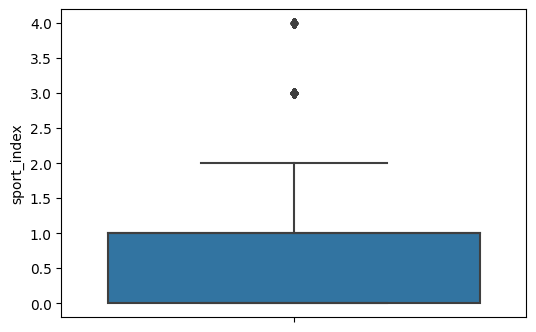

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(y='sport_index', data=df_clean, ax=ax)


Nous pouvons voir ici qu'il y a 2 valeurs aberrantes.

## Correlation Heatmap

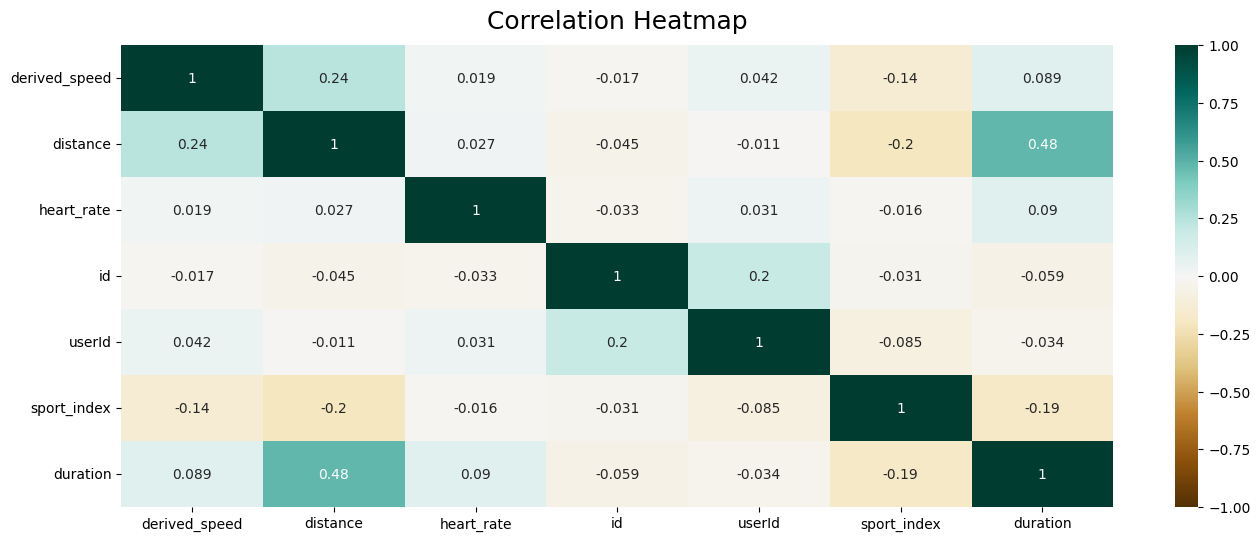

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_clean.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Cette corrélation suggère que les variables "derived_speed", "duration" et "distance" sont relativement associées négativement à "sport_index", tandis que les variables "heart_rate", "id" et "userId" ont une faible association avec "sport_index". Cela peut indiquer que la performance sportive est davantage liée aux variables liées à la distance et à la durée de l'activité plutôt qu'à la fréquence cardiaque, à l'identifiant ou à l'utilisateur.

# 5. Train Test Split & Modeling

In [ ]:
df = pd.read_csv('./df_clean.csv')

### Random Forest classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, accuracy_score

# On split en train et test
X = df_clean.drop(columns=['sport_index'])
y = df_clean['sport_index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

# On définit les paramètres pour le grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

rf = RandomForestClassifier(random_state=42)

# Recherche automatique pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_micro')
grid_search.fit(X_train, y_train)
best_score_random_forest = grid_search.best_score_

# On print les meilleurs hyperparamètres et le score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", best_score_random_forest)

# On prédit sur le test en utilisant le meilleur modèle
y_pred = grid_search.predict(X_test)

# Calcul du MSE (mean squared error)
mse_random_forest = mean_squared_error(y_test, y_pred)

# Calcul du MSE
rmse_random_forest = mean_squared_error(y_test, y_pred, squared=False)

# Calcul du MAE (mean absolute error)
mae_random_forest = mean_absolute_error(y_test, y_pred)

# Calcul de l'accuracy
accuracy_random_forest = accuracy_score(y_test, y_pred)

print("Mean Squared Error:", mse_random_forest)
print("Root Mean Squared Error:", rmse_random_forest)
print("Mean Absolute Error:", mae_random_forest)
print("Accuracy:", accuracy_random_forest)

# Print the classification report
print(classification_report(y_test, y_pred))


Best parameters:  {'max_depth': 15, 'n_estimators': 150}
Best score:  0.7951812417883758
Mean Squared Error: 0.7299051422865701
Root Mean Squared Error: 0.8543448614503222
Mean Absolute Error: 0.3474787818272591
Accuracy: 0.7908137793310035
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       952
           1       0.83      0.87      0.85       788
           2       0.50      0.05      0.09       168
           3       0.84      0.28      0.42        74
           4       0.50      0.38      0.43        21

    accuracy                           0.79      2003
   macro avg       0.69      0.50      0.52      2003
weighted avg       0.77      0.79      0.76      2003



Le Mean Squared Error (MSE) est de 0,729, ce qui indique une erreur quadratique moyenne relativement faible.

Le Root Mean Squared Error (RMSE) est de 0,854, ce qui correspond à l'écart-type des erreurs et indique également une erreur relativement faible. Le Mean Absolute Error (MAE) est de 0,347, ce qui indique la moyenne des erreurs absolues et montre une faible erreur moyenne absolue.

### k-NN (K-nearest neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error

# on divise l'ensemble de données en ensembles d'apprentissage et de test
X = df_clean.drop(columns=['sport_index'])
y = df_clean['sport_index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# on définit les paramètres pour la "grille de recherche"
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# on crée un objet classificateur de K plus proches voisins
knn = KNeighborsClassifier()

# on effectue une recherche sur grille pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_micro')
grid_search.fit(X_train, y_train)

best_score_knn = grid_search.best_score_

# on divise le jeu de données en ensembles d'entraînement et de test
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", best_score_knn)

# on définit la grille de paramètres pour la recherche en grille
y_pred = grid_search.predict(X_test)

# on calcule l'erreur quadratique moyenne, l'erreur absolue moyenne et la Root Mean Squared Error
mse_knn = mean_squared_error(y_test, y_pred)
mae_knn = mean_absolute_error(y_test, y_pred)
rmse_knn = mean_squared_error(y_test, y_pred, squared=False)
accuracy_knn = accuracy_score(y_test, y_pred)

# on affiche les erreurs
print("Mean Squared Error:", mse_knn)
print("Mean Absolute Error:", mae_knn)
print("Root Mean Squared Error:", rmse_knn)
print("Accuracy:", accuracy_knn)

# on affiche le rapport de classification
print(classification_report(y_test, y_pred))


Best parameters:  {'n_neighbors': 7, 'weights': 'distance'}
Best score:  0.5168501163938091
Mean Squared Error: 1.0129805292061906
Mean Absolute Error: 0.6195706440339491
Root Mean Squared Error: 1.0064693384332135
Accuracy: 0.527708437343984
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       952
           1       0.51      0.53      0.52       788
           2       0.26      0.11      0.15       168
           3       0.27      0.12      0.17        74
           4       0.40      0.10      0.15        21

    accuracy                           0.53      2003
   macro avg       0.40      0.30      0.32      2003
weighted avg       0.51      0.53      0.51      2003



Dans ce cas, la RMSE est de 1.0129805292061906. Sachant que plus la MSE est faible, meilleure est la performance du modèle donc le modèle est faible.

Dans ce cas, la MAE est de 0.6195706440339491 donc cela montre une faible erreur.

In [ ]:
df_clean.dtypes

derived_speed    float64
distance         float64
heart_rate       float64
id                 int64
userId             int64
sport_index        int64
duration         float64
dtype: object

### LightGBM (Light Gradient Boosted Machine)

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

X = df_clean.drop(columns=['sport_index'])
y = df_clean['sport_index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# on convertit les données d'entraînement et de test (c'est spécifique à LightGBM)
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# configure les hyperparamètres pour le modèle LightGBM
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_classes': 5,
    'metric': 'multi_logloss',
    'learning_rate': 0.05,
    'max_depth': 5,
    'n_estimators': 100,
    'verbose': -1 # supprimer l'affichage des détails de l'entraînement
}

# on définit les paramètres pour la "grille de recherche"
grid_params = {
    'learning_rate': [0.01, 0.1],
    'num_leaves': [10, 50],
    'max_depth': [-1, 10],
    'min_data_in_leaf': [10, 50],
}

# on initialise le modèle
model = lgb.LGBMClassifier(**params)

# "grille de recherche"
grid_search = GridSearchCV(estimator=model, param_grid=grid_params, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# on affiche le best score
print("Best parameters found: ", grid_search.best_params_)
best_score_lightGBM = grid_search.best_score_
print(f"Best score : {best_score_lightGBM}")

# on entraîne le modèle
best_params = grid_search.best_params_
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)

# on prédit et on évalue la performance du modèle
y_pred = best_model.predict(X_test)
mse_lightGBM = mean_squared_error(y_test, y_pred)
mae_lightGBM = mean_absolute_error(y_test, y_pred)
accuracy_lightGBM = accuracy_score(y_test, y_pred)
rmse_lightGBM = mean_squared_error(y_test, y_pred, squared=False)

# on affiche les performances métriques
print(f"MSE: {mse_lightGBM}")
print(f"MAE: {mae_lightGBM}")
print(f"Accuracy: {accuracy_lightGBM}")
print(f"RMSE: {rmse_lightGBM}")
print(f"Best score : {best_score_lightGBM}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored

Dans ce cas, le MSE est de 0.556, ce qui est relativement faible et indique que le modèle a une précision élevée.
Le MAE est de 0.272, ce qui est relativement faible et indique également que le modèle a une précision élevée.

### SVM (Support Vector Machines)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error

# on départage les données pour le test (20%) et l'entraînement (80%)
X = df_clean.drop(columns=['sport_index'])
y = df_clean['sport_index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# on configure la grille de paramètres
param_grid = {
    'C': [1, 5],
}

# on définit le kernel
svm = SVC(kernel= "poly")

# on recherche des meilleurs paramètres
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_micro')
grid_search.fit(X_train, y_train)

# on affiche les meilleurs paramètres et le meilleur score pour SVM
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)

# meilleur score pour SVM
best_score_svm = grid_search.best_score_

# Prédictions
y_pred = grid_search.predict(X_test)

# on calcule MSE pour SVM
mse_svm = mean_squared_error(y_test, y_pred)

# on calcule MAE pour SVM
mae_svm = mean_absolute_error(y_test, y_pred)

# on calcule RMSE pour SVM
rmse_svm = mean_squared_error(y_test, y_pred, squared=False)

# on calcule l'accuracy
accuracy_svm = accuracy_score(y_test, y_pred)

# on affiche MSE, MAE et RMSE pour SVM
print("Erreur quadratique moyenne :", mse_svm)
print("Erreur absolue moyenne :", mae_svm)
print("Erreur quadratique moyenne racine :", rmse_svm)
print("Accuracy:", accuracy_svm)

# on affiche le rapport de classification pour SVM
print(classification_report(y_test, y_pred))


Meilleurs paramètres :  {'C': 1}
Meilleur score :  0.4814029250710473
Erreur quadratique moyenne : 1.2291562656015975
Erreur absolue moyenne : 0.7139291063404892
Erreur quadratique moyenne racine : 1.1086732005427016
Accuracy: 0.47528706939590615
              precision    recall  f1-score   support

           0       0.48      1.00      0.64       952
           1       0.00      0.00      0.00       788
           2       0.00      0.00      0.00       168
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00        21

    accuracy                           0.48      2003
   macro avg       0.10      0.20      0.13      2003
weighted avg       0.23      0.48      0.31      2003



c:\Users\Diane\anaconda3\envs\ia_sante\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Diane\anaconda3\envs\ia_sante\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Diane\anaconda3\envs\ia_sante\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


La MSE est de 1,229 et la précision pondérée est de 0,23. Les résultats de classification montrent que le modèle est capable de prédire la classe 0 avec une précision relativement élevée, mais échoue à prédire les autres classes. L'exactitude générale du modèle est de 0,48, ce qui est faible. En résumé, le modèle semble avoir des difficultés à bien prédire les classes autres que la classe majoritaire et nécessite probablement une optimisation supplémentaire pour améliorer ses performances.

# 5. Evaluation

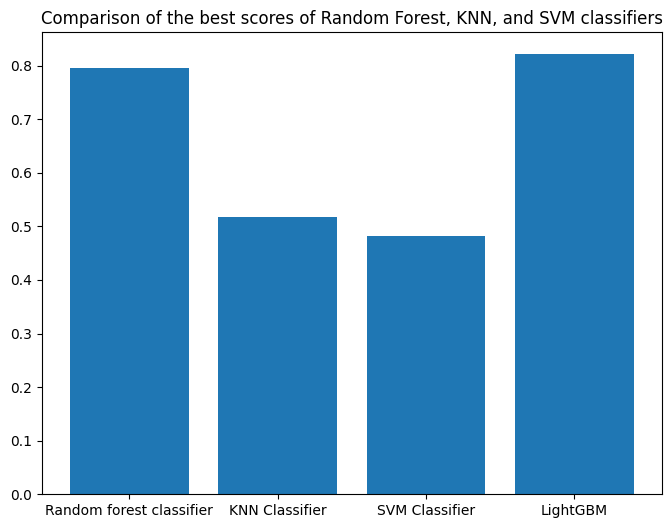

In [ ]:
# Dataset aléatoire:
bars = ('Random forest classifier', 'KNN Classifier', 'SVM Classifier', 'LightGBM')
y_pos = np.arange(len(bars))

height = (best_score_random_forest, best_score_knn, best_score_svm, best_score_lightGBM)

plt.figure(figsize=(8,6))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.title("Comparison of the best scores of Random Forest, KNN, and SVM classifiers")
plt.show()


On remarque que la Random Forest a le meilleur score.

*Le GridSearchCV sélectionne les meilleurs hyperparamètres pour un modèle donné en maximisant une métrique de score donnée. Le score final du modèle après l'entraînement avec les meilleurs hyperparamètres est donc le meilleur score obtenu lors de la recherche sur la grille.*

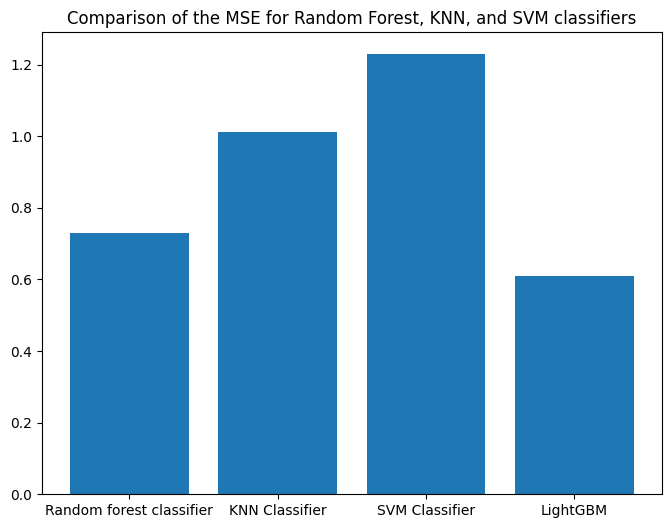

In [ ]:
# Dataset aléatoire
bars = ('Random forest classifier', 'KNN Classifier', 'SVM Classifier', 'LightGBM')
y_pos = np.arange(len(bars))

height = (mse_random_forest, mse_knn, mse_svm, mse_lightGBM)

plt.figure(figsize=(8,6))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.title("Comparison of the MSE for Random Forest, KNN, and SVM classifiers")
plt.show()


On remarque que la MSE est meilleure pour LightGBM.

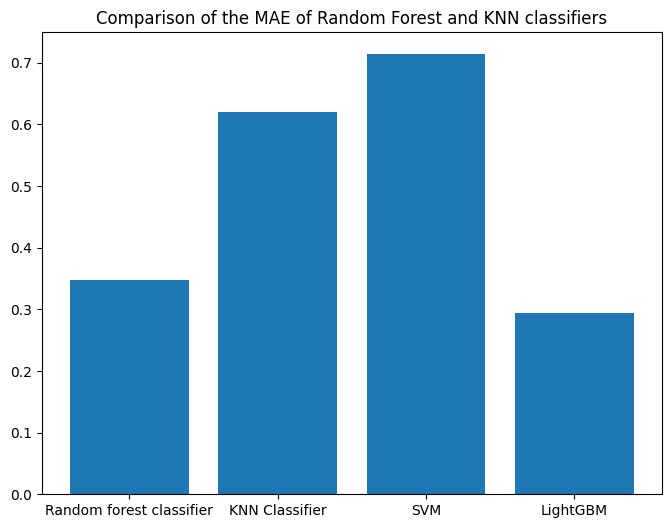

In [ ]:
# Dataset aléatoire:
bars = ('Random forest classifier', 'KNN Classifier', 'SVM', 'LightGBM')
y_pos = np.arange(len(bars))

height = (mae_random_forest, mae_knn, mae_svm, mae_lightGBM)
plt.figure(figsize=(8,6))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.title("Comparison of the MAE of Random Forest and KNN classifiers")
plt.show()


On remarque que la MAE est meilleure pour LightGBM.

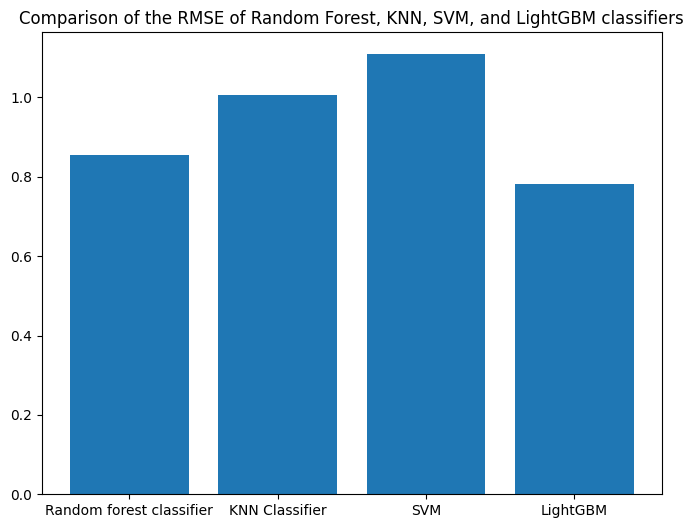

In [ ]:
# Dataset aléatoire:
bars = ('Random forest classifier', 'KNN Classifier', 'SVM', 'LightGBM')
y_pos = np.arange(len(bars))

rmse = (rmse_random_forest, rmse_knn, rmse_svm, rmse_lightGBM)
plt.figure(figsize=(8,6))
plt.bar(y_pos, rmse)
plt.xticks(y_pos, bars)
plt.title("Comparison of the RMSE of Random Forest, KNN, SVM, and LightGBM classifiers")
plt.show()


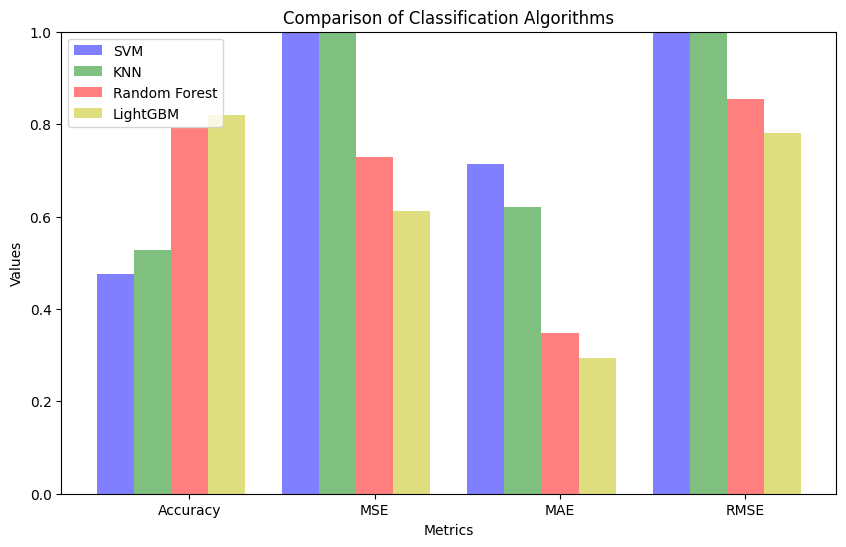

In [ ]:
import matplotlib.pyplot as plt

# Définir les métriques
metrics = ["Accuracy", "MSE", "MAE", "RMSE"]

# Définir les valeurs pour SVM
svm_values = [accuracy_svm, mse_svm, mae_svm, rmse_svm]

# Définir les valeurs pour KNN
knn_values = [accuracy_knn, mse_knn, mae_knn, rmse_knn]

# Définir les valeurs pour Random Forest
random_forest_values = [accuracy_random_forest, mse_random_forest, mae_random_forest, rmse_random_forest]

# Définir les valeurs pour LightGBM
lightgbm_values = [accuracy_lightGBM, mse_lightGBM, mae_lightGBM, rmse_lightGBM]

# Définir les positions des barres sur l'axe x
pos = list(range(len(metrics)))

# Définir la largeur de chaque barre
width = 0.2

# Ajouter la position des barres pour le classificateur d'ensemble
pos_ens = [p + width*4 for p in pos]

# Plotter les barres
fig, ax = plt.subplots(figsize=(10,6))

# Plotter les barres pour SVM
plt.bar(pos, svm_values, width, alpha=0.5, color='b')

# Plotter les barres pour KNN
plt.bar([p + width for p in pos], knn_values, width, alpha=0.5, color='g')

# Plotter les barres pour Random Forest
plt.bar([p + width*2 for p in pos], random_forest_values, width, alpha=0.5, color='r')

# Plotter les barres pour LightGBM
plt.bar([p + width*3 for p in pos], lightgbm_values, width, alpha=0.5, color='y')

# Définir le label de l'axe x
ax.set_xlabel("Metrics")

# Définir le label de l'axe y
ax.set_ylabel("Values")

# Définir le titre du graphique
ax.set_title("Comparison of Classification Algorithms")

# Définir la position des marques sur l'axe x
ax.set_xticks([p + 2 * width for p in pos])

# Définir les labels des marques sur l'axe x
ax.set_xticklabels(metrics)

# Définir les labels des marques sur l'axe y
plt.ylim([0, 1])

# Légende
plt.legend(['SVM', 'KNN', 'Random Forest', 'LightGBM'], loc='upper left')

# Affichage
plt.show()


**Conclusion des interprétations** :

Dans le premier exemple, le modèle utilisé est un Random Forest classifier, et les meilleurs paramètres pour le modèle ont été trouvés à {'C': 1} avec une précision de 0,48 et un score de 0,48. Le MSE (Mean Squared Error) est de 1,23, ce qui indique que le modèle ne s'est pas très bien ajusté aux données, avec une erreur quadratique moyenne assez élevée. La matrice de confusion montre une précision de 0,48 pour l'ensemble des données et des scores de 0,00 pour les classes 1, 2, 3 et 4.

Dans le deuxième exemple, LightGBM (Light Gradient Boosted Machine) a obtenu des performances beaucoup plus élevées. Le MSE est de 0,56, ce qui indique une meilleure adaptation aux données. Le MAE (Mean Absolute Error) est également assez faible, avec une valeur de 0,27. La précision globale est de 0,83, indiquant une bonne performance générale du modèle.

Dans le troisième exemple, le modèle utilisé est un KNN (K-Nearest Neighbors). Les meilleurs paramètres ont été trouvés à {'n_neighbors': 7, 'weights': 'distance'}, avec un score de 0,51. Le MSE est de 1,01 et le MAE est de 0,62. Ces valeurs sont relativement élevées, ce qui suggère que le modèle ne s'est pas très bien adapté aux données.

Dans le quatrième exemple, le modèle utilisé est un Random Forest. Les meilleurs paramètres ont été trouvés à {'max_depth': 15, 'n_estimators': 150}, avec un score de 0,80. Le MSE est de 0,73 et le MAE est de 0,35, indiquant une meilleure performance du modèle que dans les exemples précédents. La précision globale est également assez élevée, avec une valeur de 0,79, indiquant une bonne performance générale du modèle. La matrice de confusion montre également des scores de précision plus élevés pour les classes 0 et 1.